## Data Preparation

This Jupyter notebook is used to:

1. Clean the data (null values) and handle data types (such as timestamp).
2. One-Hot encode categorical features.
3. Standardize & Normalize continuous features.
4. Check correlations.
5. Write the result to single file, ready for ML model (model_*).

## 0. Load the data

In [1]:
# imports:
import pandas as pd
import matplotlib.pyplot as plt
import os

PREFIX_PATH = '/home/sramkova/diploma_thesis_data/cicids2017/attacks'
PREFIX_PATH = PREFIX_PATH + '/' + '/'.join(os.getcwd().split('/')[-2:]) + '/'
INPUT_CSV = PREFIX_PATH + 'query_output_processing.csv'
print(INPUT_CSV)

raw_data = pd.read_csv(INPUT_CSV, low_memory=False)

# check that all columns are correctly loaded
raw_data.head()

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/query_output_processing.csv


originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25   0x99  ChFW9X31rgQuPcZklh                    SF   
1  192.168.10.25   0xc3   CGXL9o4dBJDT4WfRi                    SF   
2  192.168.10.25   0xf1  CskeJZ3qePKwfJ1YAl                   SHR   
3  192.168.10.25  0x145  C9uQO31v3ZSeHD2pLg                    SF   
4  192.168.10.25  0x22a  ChFVpJ1gniKec3d7tg                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.144792                   1397                      1901   
1            30.729384                   2084                      2980   
2             0.000003                      0                         0   
3             0.000115                    188                       244   
4             0.001121                     76                       132   

   connection.orig_p  connection.orig_pkts connection.proto  ...  \
0              49180                    12              tcp  ...   
1              49186                    17              tcp  ...   
2              49184                     0              udp  ...   
3              49168                     2              udp  ...   
4              53678                     2              udp  ...   

   resp_resp_similar_http_status_code_count  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   resp_resp_similar_http_user_agent_count  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   resp_resp_similar_ssl_version_count  resp_resp_similar_ssl_cipher_count  \
0                                    0                                   0   
1                                    0                                   0   
2                                    0                                   0   
3                                    0                                   0   
4                                    0                                   0   

  resp_resp_similar_ssl_curve_count  \
0                                 0   
1                                 0   
2                                 0   
3                                 0   
4                                 0   

  resp_resp_similar_ssl_validation_status_count  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

  resp_resp_similar_files_source_count  resp_resp_similar_file_md5_count  \
0                                    0                                 0   
1                                    0                                 0   
2                                    0                                 0   
3                                    0                                 0   
4                                    0                                 0   

   attacker_label  victim_label  
0              No            No  
1              No            No  
2              No           Yes  
3              No            No  
4              No            No  

[5 rows x 219 columns]

In [2]:
pd.set_option('display.max_columns', None)
raw_data

originated_ip       uid      connection.uid connection.conn_state  \
0      192.168.10.25      0x99  ChFW9X31rgQuPcZklh                    SF   
1      192.168.10.25      0xc3   CGXL9o4dBJDT4WfRi                    SF   
2      192.168.10.25      0xf1  CskeJZ3qePKwfJ1YAl                   SHR   
3      192.168.10.25     0x145  C9uQO31v3ZSeHD2pLg                    SF   
4      192.168.10.25     0x22a  ChFVpJ1gniKec3d7tg                    SF   
...              ...       ...                 ...                   ...   
21871     172.16.0.1  0x2f540e  CEBkim3SODxmHP3Si1                    SF   
21872     172.16.0.1  0x2f545a   CA5pWIOgLpDwOvUH7                    SF   
21873     172.16.0.1  0x2f545f  CRLKph2lTz0g5MXEei                    SF   
21874     172.16.0.1  0x2f54a8  Ct6gLY3dLcvTIyZmol                    SF   
21875   192.168.10.1   0xf4846  CtY3US3I9spdTIc8Hd                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0                 0.144792                   1397                      1901   
1                30.729384                   2084                      2980   
2                 0.000003                      0                         0   
3                 0.000115                    188                       244   
4                 0.001121                     76                       132   
...                    ...                    ...                       ...   
21871             5.881235                      0                       216   
21872             5.212899                      0                       216   
21873             5.917806                      0                       216   
21874             5.960130                      0                       216   
21875             3.124152                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
0                  49180                    12              tcp   
1                  49186                    17              tcp   
2                  49184                     0              udp   
3                  49168                     2              udp   
4                  53678                     2              udp   
...                  ...                   ...              ...   
21871              48070                     4              tcp   
21872              49570                     4              tcp   
21873              49668                     4              tcp   
21874              50390                     4              tcp   
21875                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                       3322                      3694                443   
1                       4180                      4812                443   
2                        124                       180                137   
3                        326                       382                389   
4                        484                       540                 53   
...                      ...                       ...                ...   
21871                      0                       112                 80   
21872                      0                       112                 80   
21873                      0                       112                 80   
21874                      0                       112                 80   
21875                      0                         0                  3   

       connection.resp_pkts connection.service                connection.ts  \
0                         9                ssl  2017-07-06T12:06:35.060859Z   
1                        12                ssl  2017-07-06T12:06:37.071614Z   
2                         2                dns  2017-07-06T12:05:16.358339Z   
3                         2               none  2017-07-06T12:04:38.814779Z   
4                   

### Frequency percentage of labels:

In [3]:
raw_data['attacker_label'].value_counts()

No     21572
Yes      304
Name: attacker_label, dtype: int64

In [4]:
count_attacker = pd.value_counts(raw_data['attacker_label'])
count_victim = pd.value_counts(raw_data['victim_label'])
percentage_df = pd.DataFrame({'Class':['Yes', 'No'], 'Frequency Percentage':[min(count_victim['Yes'], count_attacker['Yes'])/len(raw_data), 
                                                                             (len(raw_data) - min(count_victim['Yes'], count_attacker['Yes']))/len(raw_data)]})

In [5]:
percentage_df

Class  Frequency Percentage
0   Yes              0.013897
1    No              0.986103

<AxesSubplot:xlabel='Class'>

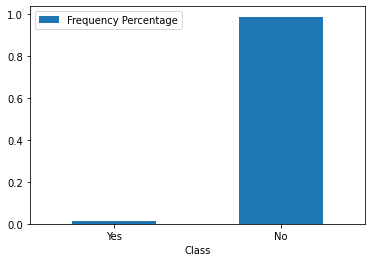

In [6]:
percentage_df.plot.bar(x='Class', y='Frequency Percentage', rot=0)

# Data cleaning & preparation

(https://www.keboola.com/blog/the-ultimate-guide-to-data-cleaning)

Possible problems:

1. Missing values (here only specific values in rows)
2. Data distribution (see more heavily represented ranges, check outliers)
3. Impossible values ("date == blue")
4. Data consistency (lower vs. uppercase)

### 1.0 Null values 

a) ignore

b) drop row/ column with these

c) fill in missing values

In [7]:
# clean garbage (null, NaN, ..)
pd.set_option('display.max_rows', None)
raw_data.isnull().sum()

originated_ip                                    0
uid                                              0
connection.uid                                   0
connection.conn_state                            0
connection.duration                              0
connection.orig_bytes                            0
connection.orig_ip_bytes                         0
connection.orig_p                                0
connection.orig_pkts                             0
connection.proto                                 0
connection.resp_bytes                            0
connection.resp_ip_bytes                         0
connection.resp_p                                0
connection.resp_pkts                             0
connection.service                               0
connection.ts                                    0
responded_ip                                     0
dns_count                                        0
ssh_count                                        0
http_count                     

In [8]:
pd.reset_option('display.max_rows')

In [9]:
raw_data[raw_data.isnull().any(axis=1)]

originated_ip       uid      connection.uid connection.conn_state  \
21570  188.92.40.81  0x186f4e  CObolP3grsS7AhSjpg                   OTH   
21875  192.168.10.1   0xf4846  CtY3US3I9spdTIc8Hd                   OTH   

       connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
21570            36.226022                     56                       112   
21875             3.124152                     84                       168   

       connection.orig_p  connection.orig_pkts connection.proto  \
21570                  3                     2             icmp   
21875                  3                     3             icmp   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
21570                      0                         0                  1   
21875                      0                         0                  3   

       connection.resp_pkts connection.service                connection.ts  \
21570                     0               none  2017-07-06T12:22:14.323396Z   
21875                     0               none  2017-07-06T12:20:54.996554Z   

        responded_ip  dns_count  ssh_count  http_count  ssl_count  \
21570  192.168.10.19          0          0           0          0   
21875   192.168.10.3          0          0           0          0   

       files_count dns_qtype dns_rcode ssh_auth_attempts ssh_host_key  \
21570            0       NaN       NaN               NaN          NaN   
21875            0       NaN       NaN               NaN          NaN   

      http_method http_status_code http_user_agent ssl_version ssl_cipher  \
21570         NaN              NaN             NaN         NaN        NaN   
21875         NaN              NaN             NaN         NaN        NaN   

      ssl_curve ssl_validation_status files_source file_md5 dns_dicts  \
21570       NaN                   NaN          NaN      NaN       NaN   
21875       NaN                   NaN          NaN      NaN       NaN   

      ssh_dicts http_dicts ssl_dicts files_dicts  \
21570       NaN        NaN       NaN         NaN   
21875       NaN        NaN       NaN         NaN   

                        connection.time  orig_orig_total  \
21570  2017-07-06 12:22:14.323396+00:00                1   
21875  2017-07-06 12:20:54.996554+00:00                1   

       orig_orig_proto_tcp_count  orig_orig_proto_udp_count  \
21570                          0                          0   
21875                          0                          0   

       orig_orig_proto_icmp_count orig_orig_connection.protocol_mode  \
21570                           1                               icmp   
21875                           1                               icmp   

      orig_orig_connection.service_mode orig_orig_connection.conn_state_mode  \
21570                              none                                  OTH   
21875                              none                                  OTH   

            orig_orig_connection.time_mean  \
21570  2017-07-06 12:22:14.323396096+00:00   
21875  2017-07-06 12:20:54.996553984+00:00   

       orig_orig_connection.duration_mean  \
21570                           36.226022   
21875                            3.124152   

       orig_orig_connection.orig_bytes_mean  \
21570                                  56.0   
21875                                  84.0   

       orig_orig_connection.orig_pkts_mean  \
21570                                  2.0   
21875                                  3.0   

       orig_orig_connection.resp_bytes_mean  \
21570                                   0.0   
21875                                   0.0   

       orig_orig_connection.resp_pkts_mean  orig_orig_orig_p_well_known_count  \
21570                                  0.0                                  1   
21875                                  0.0                                  1   

       orig_orig_orig_p_reg_or_dyn_count  orig_orig_resp_p_21_

In [10]:
raw_data['dns_qtype'].fillna('[]', inplace = True)
raw_data['dns_rcode'].fillna('[]', inplace = True)
raw_data['ssh_auth_attempts'].fillna('[]', inplace = True)
raw_data['ssh_host_key'].fillna('[]', inplace = True)
raw_data['http_method'].fillna('[]', inplace = True)
raw_data['http_status_code'].fillna('[]', inplace = True)
raw_data['http_user_agent'].fillna('[]', inplace = True)
raw_data['ssl_version'].fillna('[]', inplace = True)
raw_data['ssl_cipher'].fillna('[]', inplace = True)
raw_data['ssl_curve'].fillna('[]', inplace = True)
raw_data['ssl_validation_status'].fillna('[]', inplace = True)
raw_data['files_source'].fillna('[]', inplace = True)
raw_data['file_md5'].fillna('[]', inplace = True)
raw_data['dns_dicts'].fillna('[]', inplace = True)
raw_data['ssh_dicts'].fillna('[]', inplace = True)
raw_data['http_dicts'].fillna('[]', inplace = True)
raw_data['ssl_dicts'].fillna('[]', inplace = True)
raw_data['files_dicts'].fillna('[]', inplace = True)

In [11]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [originated_ip, uid, connection.uid, connection.conn_state, connection.duration, connection.orig_bytes, connection.orig_ip_bytes, connection.orig_p, connection.orig_pkts, connection.proto, connection.resp_bytes, connection.resp_ip_bytes, connection.resp_p, connection.resp_pkts, connection.service, connection.ts, responded_ip, dns_count, ssh_count, http_count, ssl_count, files_count, dns_qtype, dns_rcode, ssh_auth_attempts, ssh_host_key, http_method, http_status_code, http_user_agent, ssl_version, ssl_cipher, ssl_curve, ssl_validation_status, files_source, file_md5, dns_dicts, ssh_dicts, http_dicts, ssl_dicts, files_dicts, connection.time, orig_orig_total, orig_orig_proto_tcp_count, orig_orig_proto_udp_count, orig_orig_proto_icmp_count, orig_orig_connection.protocol_mode, orig_orig_connection.service_mode, orig_orig_connection.conn_state_mode, orig_orig_connection.time_mean, orig_orig_connection.duration_mean, orig_orig_connection.orig_bytes_mean, orig_orig_connection.orig_pkts_mean, orig_orig_connection.resp_bytes_mean, orig_orig_connection.resp_pkts_mean, orig_orig_orig_p_well_known_count, orig_orig_orig_p_reg_or_dyn_count, orig_orig_resp_p_21_count, orig_orig_resp_p_22_count, orig_orig_resp_p_53_count, orig_orig_resp_p_80_count, orig_orig_resp_p_123_count, orig_orig_resp_p_443_count, orig_orig_resp_p_3389_count, orig_orig_resp_p_well_known_count, orig_orig_resp_p_reg_count, orig_orig_resp_p_dyn_count, orig_orig_dns_count_mean, orig_orig_ssh_count_mean, orig_orig_http_count_mean, orig_orig_ssl_count_mean, orig_orig_files_count_mean, orig_orig_similar_conns_count, orig_orig_similar_dns_qtype_count, orig_orig_similar_dns_rcode_count, orig_orig_similar_ssh_auth_attempts_count, orig_orig_similar_ssh_host_key_count, orig_orig_similar_http_method_count, orig_orig_similar_http_status_code_count, orig_orig_similar_http_user_agent_count, orig_orig_similar_ssl_version_count, orig_orig_similar_ssl_cipher_count, orig_orig_similar_ssl_curve_count, orig_orig_similar_ssl_validation_status_count, orig_orig_similar_files_source_count, orig_orig_similar_file_md5_count, orig_resp_total, orig_resp_proto_tcp_count, orig_resp_proto_udp_count, orig_resp_proto_icmp_count, orig_resp_connection.protocol_mode, orig_resp_connection.service_mode, orig_resp_connection.conn_state_mode, orig_resp_connection.time_mean, orig_resp_connection.duration_mean, orig_resp_connection.orig_bytes_mean, orig_resp_connection.orig_pkts_mean, orig_resp_connection.resp_bytes_mean, orig_resp_connection.resp_pkts_mean, orig_resp_orig_p_well_known_count, orig_resp_orig_p_reg_or_dyn_count, ...]
Index: []

In [12]:
data = raw_data.copy()

### 1.1 Time

Convert `date` type to `timestamp`.

In [13]:
data['orig_orig_connection.time_mean'].describe()

count                                   21876
unique                                   2194
top       2017-07-06 12:24:52.219439872+00:00
freq                                      585
Name: orig_orig_connection.time_mean, dtype: object

In [14]:
# connection.ts is in RFC 3339, ISO 8601 date format
# convert values of 'connections.ts' column to timestamp

import dateutil.parser # https://stackoverflow.com/questions/127803/how-do-i-parse-an-iso-8601-formatted-date
from datetime import datetime


def date_to_timestamp(connection_ts):
  date_format = dateutil.parser.isoparse(connection_ts)
  timestamp = datetime.timestamp(date_format)
  return timestamp

data['connection.time'] = data['connection.time'].map(lambda x: date_to_timestamp(x))
data['orig_orig_connection.time_mean'] = data['orig_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['orig_resp_connection.time_mean'] = data['orig_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_orig_connection.time_mean'] = data['resp_orig_connection.time_mean'].map(lambda x: date_to_timestamp(x))
data['resp_resp_connection.time_mean'] = data['resp_resp_connection.time_mean'].map(lambda x: date_to_timestamp(x))


data.head()

originated_ip    uid      connection.uid connection.conn_state  \
0  192.168.10.25   0x99  ChFW9X31rgQuPcZklh                    SF   
1  192.168.10.25   0xc3   CGXL9o4dBJDT4WfRi                    SF   
2  192.168.10.25   0xf1  CskeJZ3qePKwfJ1YAl                   SHR   
3  192.168.10.25  0x145  C9uQO31v3ZSeHD2pLg                    SF   
4  192.168.10.25  0x22a  ChFVpJ1gniKec3d7tg                    SF   

   connection.duration  connection.orig_bytes  connection.orig_ip_bytes  \
0             0.144792                   1397                      1901   
1            30.729384                   2084                      2980   
2             0.000003                      0                         0   
3             0.000115                    188                       244   
4             0.001121                     76                       132   

   connection.orig_p  connection.orig_pkts connection.proto  \
0              49180                    12              tcp   
1              49186                    17              tcp   
2              49184                     0              udp   
3              49168                     2              udp   
4              53678                     2              udp   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_p  \
0                   3322                      3694                443   
1                   4180                      4812                443   
2                    124                       180                137   
3                    326                       382                389   
4                    484                       540                 53   

   connection.resp_pkts connection.service                connection.ts  \
0                     9                ssl  2017-07-06T12:06:35.060859Z   
1                    12                ssl  2017-07-06T12:06:37.071614Z   
2                     2                dns  2017-07-06T12:05:16.358339Z   
3                     2               none  2017-07-06T12:04:38.814779Z   
4                     2                dns  2017-07-06T12:06:35.056945Z   

     responded_ip  dns_count  ssh_count  http_count  ssl_count  files_count  \
0     72.5.205.22          0          0           0          1            2   
1  216.58.219.205          0          0           0          1            3   
2   192.168.10.50          1          0           0          0            0   
3    192.168.10.3          0          0           0          0            0   
4    192.168.10.3          1          0           0          0            0   

  dns_qtype dns_rcode ssh_auth_attempts ssh_host_key http_method  \
0        []        []                []           []          []   
1        []        []                []           []          []   
2       [0]    [None]                []           []          []   
3        []        []                []           []          []   
4       [1]    [None]                []           []          []   

  http_status_code http_user_agent ssl_version  \
0               []              []  ['TLSv10']   
1               []              []  ['TLSv10']   
2               []              []          []   
3               []              []          []   
4               []              []          []   

                         ssl_cipher ssl_curve ssl_validation_status  \
0  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
1  ['TLS_RSA_WITH_AES_128_CBC_SHA']    [None]                [None]   
2                                []        []                    []   
3                                []        []                    []   
4                                []        []                    []   

  files_source                                           file_md5  \
0      ['SSL']  ['aaee5cf8b0d8596d2e0cbe67421cf7db', 'dc1ef3ef...   
1      ['SSL']  ['17866ccbd224bd2ff9df48b95118f935', '17c69fa9...   
2           []                                   

### Extract column names

In [15]:
# Columns names as constant lists for easier usage:

# columns that contain values of the current main connection
CONN_IDS_COLS = ['connection.uid', 'originated_ip', 'responded_ip']

CONN_NUMERICAL_COLS = ['connection.time', 
                       'connection.duration', 
                       # originator details
                       'connection.orig_p', 
                       'connection.orig_bytes', 
                       'connection.orig_ip_bytes', 
                       'connection.orig_pkts', 
                       # responder details
                       'connection.resp_p', 
                       'connection.resp_bytes', 
                       'connection.resp_ip_bytes', 
                       'connection.resp_pkts']

CONN_CATEGORICAL_COLS = ['connection.proto', 
                         'connection.service', 
                         'connection.conn_state']

CONN_APP_STATS = ['dns_count', 'ssh_count', 'http_count', 'ssl_count', 'files_count']

# originator originated neighbrouhood columns:
ORIG_ORIG_NUMERICAL_COLS = ['orig_orig_total', 
                            'orig_orig_connection.time_mean', 
                            'orig_orig_connection.duration_mean',
                            #'orig_orig_connection.orig_p_mean', 
                            'orig_orig_connection.orig_pkts_mean',
                            'orig_orig_connection.orig_bytes_mean',
                            #'orig_orig_connection.resp_p_mean', 
                            'orig_orig_connection.resp_bytes_mean',
                            'orig_orig_connection.resp_pkts_mean']
                            
ORIG_ORIG_CATEGORICAL_COLS = ['orig_orig_connection.protocol_mode', 
                              'orig_orig_connection.service_mode', 
                              'orig_orig_connection.conn_state_mode']

ORIG_ORIG_PORTS_COLS = ['orig_orig_orig_p_well_known_count', 
                        'orig_orig_orig_p_reg_or_dyn_count', 
                        'orig_orig_resp_p_21_count', 
                        'orig_orig_resp_p_22_count',
                        'orig_orig_resp_p_53_count', 
                        'orig_orig_resp_p_80_count', 
                        'orig_orig_resp_p_123_count', 
                        'orig_orig_resp_p_443_count', 
                        'orig_orig_resp_p_3389_count',
                        'orig_orig_resp_p_well_known_count', 
                        'orig_orig_resp_p_reg_count', 
                        'orig_orig_resp_p_dyn_count']

ORIG_ORIG_APP_STATS_COLS = ['orig_orig_dns_count_mean', 
                            'orig_orig_ssh_count_mean', 
                            'orig_orig_http_count_mean', 
                            'orig_orig_ssl_count_mean', 
                            'orig_orig_files_count_mean']

ORIG_ORIG_SIMILAR_COLS = ['orig_orig_similar_conns_count',
                          'orig_orig_similar_dns_qtype_count', 
                          'orig_orig_similar_dns_rcode_count', 
                          'orig_orig_similar_ssh_auth_attempts_count', 
                          'orig_orig_similar_ssh_host_key_count', 
                          'orig_orig_similar_http_method_count',
                          'orig_orig_similar_http_status_code_count', 
                          'orig_orig_similar_http_user_agent_count',
                          'orig_orig_similar_ssl_version_count', 
                          'orig_orig_similar_ssl_cipher_count', 
                          'orig_orig_similar_ssl_curve_count',
                          'orig_orig_similar_ssl_validation_status_count', 
                          'orig_orig_similar_files_source_count', 
                          'orig_orig_similar_file_md5_count']

# originator responded neighbrouhood columns:
ORIG_RESP_NUMERICAL_COLS = ['orig_resp_total', 
                            'orig_resp_connection.time_mean', 
                            'orig_resp_connection.duration_mean',
                            #'orig_resp_connection.orig_p_mean', 
                            'orig_resp_connection.orig_pkts_mean',
                            'orig_resp_connection.orig_bytes_mean',
                            #'orig_resp_connection.resp_p_mean', 
                            'orig_resp_connection.resp_bytes_mean',
                            'orig_resp_connection.resp_pkts_mean']
                            
ORIG_RESP_CATEGORICAL_COLS = ['orig_resp_connection.protocol_mode', 
                              'orig_resp_connection.service_mode', 
                              'orig_resp_connection.conn_state_mode']

ORIG_RESP_PORTS_COLS = ['orig_resp_orig_p_well_known_count', 
                        'orig_resp_orig_p_reg_or_dyn_count', 
                        'orig_resp_resp_p_21_count', 
                        'orig_resp_resp_p_22_count',
                        'orig_resp_resp_p_53_count', 
                        'orig_resp_resp_p_80_count', 
                        'orig_resp_resp_p_123_count', 
                        'orig_resp_resp_p_443_count', 
                        'orig_resp_resp_p_3389_count',
                        'orig_resp_resp_p_well_known_count', 
                        'orig_resp_resp_p_reg_count', 
                        'orig_resp_resp_p_dyn_count']

ORIG_RESP_APP_STATS_COLS = ['orig_resp_dns_count_mean', 
                            'orig_resp_ssh_count_mean', 
                            'orig_resp_http_count_mean', 
                            'orig_resp_ssl_count_mean', 
                            'orig_resp_files_count_mean']

ORIG_RESP_SIMILAR_COLS = ['orig_resp_similar_conns_count',
                          'orig_resp_similar_dns_qtype_count', 
                          'orig_resp_similar_dns_rcode_count', 
                          'orig_resp_similar_ssh_auth_attempts_count', 
                          'orig_resp_similar_ssh_host_key_count', 
                          'orig_resp_similar_http_method_count',
                          'orig_resp_similar_http_status_code_count', 
                          'orig_resp_similar_http_user_agent_count',
                          'orig_resp_similar_ssl_version_count', 
                          'orig_resp_similar_ssl_cipher_count', 
                          'orig_resp_similar_ssl_curve_count',
                          'orig_resp_similar_ssl_validation_status_count', 
                          'orig_resp_similar_files_source_count', 
                          'orig_resp_similar_file_md5_count']

# responder originated neighbrouhood columns:
RESP_ORIG_NUMERICAL_COLS = ['resp_orig_total', 
                            'resp_orig_connection.time_mean', 
                            'resp_orig_connection.duration_mean',
                            #'resp_orig_connection.orig_p_mean', 
                            'resp_orig_connection.orig_pkts_mean',
                            'resp_orig_connection.orig_bytes_mean',
                            #'resp_orig_connection.resp_p_mean', 
                            'resp_orig_connection.resp_bytes_mean',
                            'resp_orig_connection.resp_pkts_mean']
                            
RESP_ORIG_CATEGORICAL_COLS = ['resp_orig_connection.protocol_mode', 
                              'resp_orig_connection.service_mode', 
                              'resp_orig_connection.conn_state_mode']

RESP_ORIG_PORTS_COLS = ['resp_orig_orig_p_well_known_count', 
                        'resp_orig_orig_p_reg_or_dyn_count', 
                        'resp_orig_resp_p_21_count', 
                        'resp_orig_resp_p_22_count',
                        'resp_orig_resp_p_53_count', 
                        'resp_orig_resp_p_80_count', 
                        'resp_orig_resp_p_123_count', 
                        'resp_orig_resp_p_443_count', 
                        'resp_orig_resp_p_3389_count',
                        'resp_orig_resp_p_well_known_count', 
                        'resp_orig_resp_p_reg_count', 
                        'resp_orig_resp_p_dyn_count']

RESP_ORIG_APP_STATS_COLS = ['resp_orig_dns_count_mean', 
                            'resp_orig_ssh_count_mean', 
                            'resp_orig_http_count_mean', 
                            'resp_orig_ssl_count_mean', 
                            'resp_orig_files_count_mean']

RESP_ORIG_SIMILAR_COLS = ['resp_orig_similar_conns_count',
                          'resp_orig_similar_dns_qtype_count', 
                          'resp_orig_similar_dns_rcode_count', 
                          'resp_orig_similar_ssh_auth_attempts_count', 
                          'resp_orig_similar_ssh_host_key_count', 
                          'resp_orig_similar_http_method_count',
                          'resp_orig_similar_http_status_code_count', 
                          'resp_orig_similar_http_user_agent_count',
                          'resp_orig_similar_ssl_version_count', 
                          'resp_orig_similar_ssl_cipher_count', 
                          'resp_orig_similar_ssl_curve_count',
                          'resp_orig_similar_ssl_validation_status_count', 
                          'resp_orig_similar_files_source_count', 
                          'resp_orig_similar_file_md5_count']

# responder responded neighbrouhood columns:
RESP_RESP_NUMERICAL_COLS = ['resp_resp_total', 
                            'resp_resp_connection.time_mean', 
                            'resp_resp_connection.duration_mean',
                            #'resp_resp_connection.orig_p_mean', 
                            'resp_resp_connection.orig_pkts_mean',
                            'resp_resp_connection.orig_bytes_mean',
                            #'resp_resp_connection.resp_p_mean', 
                            'resp_resp_connection.resp_bytes_mean',
                            'resp_resp_connection.resp_pkts_mean']
                            
RESP_RESP_CATEGORICAL_COLS = ['resp_resp_connection.protocol_mode', 
                              'resp_resp_connection.service_mode', 
                              'resp_resp_connection.conn_state_mode']

RESP_RESP_PORTS_COLS = ['resp_resp_orig_p_well_known_count', 
                        'resp_resp_orig_p_reg_or_dyn_count', 
                        'resp_resp_resp_p_21_count', 
                        'resp_resp_resp_p_22_count',
                        'resp_resp_resp_p_53_count', 
                        'resp_resp_resp_p_80_count', 
                        'resp_resp_resp_p_123_count', 
                        'resp_resp_resp_p_443_count', 
                        'resp_resp_resp_p_3389_count',
                        'resp_resp_resp_p_well_known_count', 
                        'resp_resp_resp_p_reg_count', 
                        'resp_resp_resp_p_dyn_count']

RESP_RESP_APP_STATS_COLS = ['resp_resp_dns_count_mean', 
                            'resp_resp_ssh_count_mean', 
                            'resp_resp_http_count_mean', 
                            'resp_resp_ssl_count_mean', 
                            'resp_resp_files_count_mean']

RESP_RESP_SIMILAR_COLS = ['resp_resp_similar_conns_count',
                          'resp_resp_similar_dns_qtype_count', 
                          'resp_resp_similar_dns_rcode_count', 
                          'resp_resp_similar_ssh_auth_attempts_count', 
                          'resp_resp_similar_ssh_host_key_count', 
                          'resp_resp_similar_http_method_count',
                          'resp_resp_similar_http_status_code_count', 
                          'resp_resp_similar_http_user_agent_count',
                          'resp_resp_similar_ssl_version_count', 
                          'resp_resp_similar_ssl_cipher_count', 
                          'resp_resp_similar_ssl_curve_count',
                          'resp_resp_similar_ssl_validation_status_count', 
                          'resp_resp_similar_files_source_count', 
                          'resp_resp_similar_file_md5_count']

BACKUP_COLS = ['attacker_label', 'victim_label', 'connection.ts']

In [16]:
selected_df = data[CONN_IDS_COLS +
                   CONN_NUMERICAL_COLS +
                   CONN_CATEGORICAL_COLS + 
                   CONN_APP_STATS +
                   ORIG_ORIG_NUMERICAL_COLS + 
                   ORIG_ORIG_CATEGORICAL_COLS +
                   ORIG_ORIG_PORTS_COLS + 
                   ORIG_ORIG_APP_STATS_COLS +
                   ORIG_ORIG_SIMILAR_COLS + 
                   ORIG_RESP_NUMERICAL_COLS + 
                   ORIG_RESP_CATEGORICAL_COLS + 
                   ORIG_RESP_PORTS_COLS + 
                   ORIG_RESP_APP_STATS_COLS + 
                   ORIG_RESP_SIMILAR_COLS + 
                   RESP_ORIG_NUMERICAL_COLS + 
                   RESP_ORIG_CATEGORICAL_COLS + 
                   RESP_ORIG_PORTS_COLS + 
                   RESP_ORIG_APP_STATS_COLS + 
                   RESP_ORIG_SIMILAR_COLS + 
                   RESP_RESP_NUMERICAL_COLS +
                   RESP_RESP_CATEGORICAL_COLS + 
                   RESP_RESP_PORTS_COLS +
                   RESP_RESP_APP_STATS_COLS +
                   RESP_RESP_SIMILAR_COLS +
                   BACKUP_COLS] # backup for later
selected_df.head(5)

connection.uid  originated_ip    responded_ip  connection.time  \
0  ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1   CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2  CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3  C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4  ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.144792              49180                   1397   
1            30.729384              49186                   2084   
2             0.000003              49184                      0   
3             0.000115              49168                    188   
4             0.001121              53678                     76   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1901                    12                443   
1                      2980                    17                443   
2                         0                     0                137   
3                       244                     2                389   
4                       132                     2                 53   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   3322                      3694                     9   
1                   4180                      4812                    12   
2                    124                       180                     2   
3                    326                       382                     2   
4                    484                       540                     2   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp                ssl                    SF          0   
2              udp                dns                   SHR          1   
3              udp               none                    SF          0   
4              udp                dns                    SF          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            2              166   
1          0           0          1            3              167   
2          0           0          0            0              155   
3          0           0          0            0              152   
4          0           0          0            0              166   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499343e+09                            9.413235   
1                    1.499343e+09                            9.356868   
2                    1.499343e+09                            8.835542   
3                    1.499343e+09                            9.009927   
4                    1.499343e+09                            9.413235   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            17.138554                           1502.819277   
1                            17.041916                           1493.820359   
2                            17.490323                           1559.135484   
3                            17.657895                           1575.815789   
4                            17.138554                           1502.819277   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                           5932.951807                             9.120482   
1                           5897.425150                             9.065868   
2                           6300.870968                             9.361290   
3                           6424.822368                             9.539474   
4                           5932.951807                             9.120482   

  orig_o

### 1.2 Handle IP addresses:

Possible approaches:

1. one-hot (but too many, vector will be too big + the information about "closer" IP addresses gets lost anyway)
2. somehow convert to a number so that the closeness is preserved 

In [17]:
# https://stackoverflow.com/questions/5619685/conversion-from-ip-string-to-integer-and-backward-in-python

import socket
import struct

def ip2int(addr):
  return struct.unpack("!I", socket.inet_aton(addr))[0]

def int2ip(addr):
  return socket.inet_ntoa(struct.pack("!I", addr))

# print(ip2int('9.6# 44.13'))
# print(ip2int('9.# .44.14'))
# print(ip2int('9# 6.45.14'))
# print(ip2int('9# 6.44.255'))
# print(ip2int('1# .66.44.13'))
# print(ip2# t('0.0.0.0'))
# print(ip2int('255.255.255.255'))

In [18]:
pd.options.mode.chained_assignment = None # for warning (I really do want to update the copy here)

selected_df['responded_ip_num'] = 0
selected_df['originated_ip_num'] = 0

for i in selected_df.index:
    try:
        selected_df.at[i, 'responded_ip_num'] = ip2int(selected_df.at[i, 'responded_ip'])
        selected_df.at[i, 'originated_ip_num'] = ip2int(selected_df.at[i, 'originated_ip'])
    except:
        print(i)
        print(selected_df.at[i, 'responded_ip'])
        print(selected_df.at[i, 'originated_ip'])
        selected_df.drop(i)

### 1.3 Handle ports:

Take in consideration external information:

Responded: 

- 21, 22, 53, 80, 123, 443, 3389
- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*
- 49152 - 65535 *dynamic*

Originated: 

- 0 - 1023 *well known ports*
- 1024 - 49151 *registered*, 49152 - 65535 *dynamic*

==> create categories

One-hot encoding is useless again (too many possibilities), some have special meaning (20, 21 FTP; 80 HTTP; 110 POP3; ...), but for e.g. port scan it can be useful to also preserve that some ports are "close" to each other.


In [19]:
# 21, 22, 53, 80, 123, 443, 3389
# 0 - 1023 well known ports
# 1024 - 49151 registered
# 49152 - 65535 dynamic

common_ports_mapper = {
    21: 'resp_21',
    22: 'resp_22',
    53: 'resp_53',
    80: 'resp_80',
    123: 'resp_123',
    443: 'resp_443',
    3389: 'resp_3389',
}

def resp_port_cat_vals(value):
  if value in common_ports_mapper.keys():
    return common_ports_mapper[value]
  if value < 1024: 
    return 'resp_well_known'
  if value < 49152: 
    return 'resp_reg'
  return 'resp_dyn'

def orig_port_cat_vals(value):
  if value < 1024: 
    return 'orig_well_known'
  return 'orig_reg_or_dyn'

In [20]:
selected_df['orig_p_cat'] = ''
selected_df['resp_p_cat'] = ''

for i in selected_df.index:
    selected_df.at[i, 'orig_p_cat'] = orig_port_cat_vals(selected_df.at[i, 'connection.orig_p'])
    selected_df.at[i, 'resp_p_cat'] = resp_port_cat_vals(selected_df.at[i, 'connection.resp_p'])

selected_df.head()

connection.uid  originated_ip    responded_ip  connection.time  \
0  ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1   CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2  CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3  C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4  ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   

   connection.duration  connection.orig_p  connection.orig_bytes  \
0             0.144792              49180                   1397   
1            30.729384              49186                   2084   
2             0.000003              49184                      0   
3             0.000115              49168                    188   
4             0.001121              53678                     76   

   connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      1901                    12                443   
1                      2980                    17                443   
2                         0                     0                137   
3                       244                     2                389   
4                       132                     2                 53   

   connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                   3322                      3694                     9   
1                   4180                      4812                    12   
2                    124                       180                     2   
3                    326                       382                     2   
4                    484                       540                     2   

  connection.proto connection.service connection.conn_state  dns_count  \
0              tcp                ssl                    SF          0   
1              tcp                ssl                    SF          0   
2              udp                dns                   SHR          1   
3              udp               none                    SF          0   
4              udp                dns                    SF          1   

   ssh_count  http_count  ssl_count  files_count  orig_orig_total  \
0          0           0          1            2              166   
1          0           0          1            3              167   
2          0           0          0            0              155   
3          0           0          0            0              152   
4          0           0          0            0              166   

   orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
0                    1.499343e+09                            9.413235   
1                    1.499343e+09                            9.356868   
2                    1.499343e+09                            8.835542   
3                    1.499343e+09                            9.009927   
4                    1.499343e+09                            9.413235   

   orig_orig_connection.orig_pkts_mean  orig_orig_connection.orig_bytes_mean  \
0                            17.138554                           1502.819277   
1                            17.041916                           1493.820359   
2                            17.490323                           1559.135484   
3                            17.657895                           1575.815789   
4                            17.138554                           1502.819277   

   orig_orig_connection.resp_bytes_mean  orig_orig_connection.resp_pkts_mean  \
0                           5932.951807                             9.120482   
1                           5897.425150                             9.065868   
2                           6300.870968                             9.361290   
3                           6424.822368                             9.539474   
4                           5932.951807                             9.120482   

  orig_o

### 2. One-Hot encode categorical features for PCA:

- newly created port categories
- connection.proto
- connection.service
- connection.conn_state

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

# custom one hot encoder that just directly assigns correct names to columns
class OneHotEncoderWithColNames(BaseEstimator, TransformerMixin):

    def __init__(self, **kwargs):
        self.feature_names = []

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        result = pd.get_dummies(X)
        print(result.columns)
        self.feature_names = result.columns

        return result

#### 2.0 Ports:

In [22]:
ohe_orig_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_orig_p_df = pd.DataFrame(ohe_orig_p.fit_transform(selected_df[['orig_p_cat']]))
selected_df = selected_df.join(ohe_orig_p_df)

ohe_resp_p = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_resp_p_df = pd.DataFrame(ohe_resp_p.fit_transform(selected_df[['resp_p_cat']]))
selected_df = selected_df.join(ohe_resp_p_df)
selected_df

Index(['orig_p_cat_orig_reg_or_dyn', 'orig_p_cat_orig_well_known'], dtype='object')
Index(['resp_p_cat_resp_123', 'resp_p_cat_resp_21', 'resp_p_cat_resp_22',
       'resp_p_cat_resp_443', 'resp_p_cat_resp_53', 'resp_p_cat_resp_80',
       'resp_p_cat_resp_dyn', 'resp_p_cat_resp_reg',
       'resp_p_cat_resp_well_known'],
      dtype='object')


connection.uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.144792              49180                   1397   
1                30.729384              49186                   2084   
2                 0.000003              49184                      0   
3                 0.000115              49168                    188   
4                 0.001121              53678                     76   
...                    ...                ...                    ...   
21871             5.881235              48070                      0   
21872             5.212899              49570                      0   
21873             5.917806              49668                      0   
21874             5.960130              50390                      0   
21875             3.124152                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1901                    12                443   
1                          2980                    17                443   
2                             0                     0                137   
3                           244                     2                389   
4                           132                     2                 53   
...                         ...                   ...                ...   
21871                       216                     4                 80   
21872                       216                     4                 80   
21873                       216                     4                 80   
21874                       216                     4                 80   
21875                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       3322                      3694                     9   
1                       4180                      4812                    12   
2                        124                       180                     2   
3                        326                       382                     2   
4                        484                       540                     2   
...                      ...                       ...                   ...   
21871                      0                       112                     2   
21872                      0                       112                     2   
21873                      0                       112                     2   
21874                      0                       112                     2   
21875                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  udp                dns                   SHR          1   
3                  udp             

In [23]:
OHE_ORIG_P_CAT_COLS = ['orig_p_cat_orig_reg_or_dyn', 
                       'orig_p_cat_orig_well_known']

OHE_RESP_P_CAT_COLS = ['resp_p_cat_resp_123', 
                       'resp_p_cat_resp_21', 
                       'resp_p_cat_resp_22',
                       'resp_p_cat_resp_443', 
                       'resp_p_cat_resp_53',
                       'resp_p_cat_resp_80', 
                       'resp_p_cat_resp_dyn', 
                       'resp_p_cat_resp_reg',
                       'resp_p_cat_resp_well_known']

#### 2.1 Protocols:

In [24]:
ohe_proto = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_proto_df = pd.DataFrame(ohe_proto.fit_transform(selected_df[['connection.proto']]))

OHE_PROTO_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_proto_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_proto_df.columns:
    OHE_PROTO_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_proto_df)
selected_df

Index(['connection.proto_icmp', 'connection.proto_tcp',
       'connection.proto_udp'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/ohe_proto_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.144792              49180                   1397   
1                30.729384              49186                   2084   
2                 0.000003              49184                      0   
3                 0.000115              49168                    188   
4                 0.001121              53678                     76   
...                    ...                ...                    ...   
21871             5.881235              48070                      0   
21872             5.212899              49570                      0   
21873             5.917806              49668                      0   
21874             5.960130              50390                      0   
21875             3.124152                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1901                    12                443   
1                          2980                    17                443   
2                             0                     0                137   
3                           244                     2                389   
4                           132                     2                 53   
...                         ...                   ...                ...   
21871                       216                     4                 80   
21872                       216                     4                 80   
21873                       216                     4                 80   
21874                       216                     4                 80   
21875                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       3322                      3694                     9   
1                       4180                      4812                    12   
2                        124                       180                     2   
3                        326                       382                     2   
4                        484                       540                     2   
...                      ...                       ...                   ...   
21871                      0                       112                     2   
21872                      0                       112                     2   
21873                      0                       112                     2   
21874                      0                       112                     2   
21875                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  udp                dns                   SHR          1   
3                  udp             

#### 2.2 Services:

In [25]:
ohe_conn_service = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_service_df = pd.DataFrame(ohe_conn_service.fit_transform(selected_df[['connection.service']]))

OHE_SERVICE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_service_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_service_df.columns:
    OHE_SERVICE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_service_df)
selected_df

Index(['connection.service_dce_rpc', 'connection.service_dns',
       'connection.service_ftp', 'connection.service_ftp-data',
       'connection.service_http', 'connection.service_krb',
       'connection.service_krb,smb,gssapi', 'connection.service_krb_tcp',
       'connection.service_none', 'connection.service_ntlm,gssapi,smb',
       'connection.service_ntp', 'connection.service_smb,gssapi',
       'connection.service_smb,gssapi,dce_rpc', 'connection.service_ssh',
       'connection.service_ssl'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/ohe_service_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.144792              49180                   1397   
1                30.729384              49186                   2084   
2                 0.000003              49184                      0   
3                 0.000115              49168                    188   
4                 0.001121              53678                     76   
...                    ...                ...                    ...   
21871             5.881235              48070                      0   
21872             5.212899              49570                      0   
21873             5.917806              49668                      0   
21874             5.960130              50390                      0   
21875             3.124152                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1901                    12                443   
1                          2980                    17                443   
2                             0                     0                137   
3                           244                     2                389   
4                           132                     2                 53   
...                         ...                   ...                ...   
21871                       216                     4                 80   
21872                       216                     4                 80   
21873                       216                     4                 80   
21874                       216                     4                 80   
21875                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       3322                      3694                     9   
1                       4180                      4812                    12   
2                        124                       180                     2   
3                        326                       382                     2   
4                        484                       540                     2   
...                      ...                       ...                   ...   
21871                      0                       112                     2   
21872                      0                       112                     2   
21873                      0                       112                     2   
21874                      0                       112                     2   
21875                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  udp                dns                   SHR          1   
3                  udp             

#### 2.3 Connection states:

In [26]:
ohe_conn_state = OneHotEncoderWithColNames(handle_unknown='ignore')
ohe_conn_state_df = pd.DataFrame(ohe_conn_state.fit_transform(selected_df[['connection.conn_state']]))

OHE_CONN_STATE_CAT_COLS = []
col_names_file = PREFIX_PATH + 'ohe_conn_state_cat_cols.txt'
print(col_names_file)
f = open(col_names_file, 'w')
for ohe_col in ohe_conn_state_df.columns:
    OHE_CONN_STATE_CAT_COLS.append(ohe_col)
    f.write(ohe_col + '\n')
f.close()

selected_df = selected_df.join(ohe_conn_state_df)
selected_df

Index(['connection.conn_state_OTH', 'connection.conn_state_REJ',
       'connection.conn_state_RSTO', 'connection.conn_state_RSTR',
       'connection.conn_state_RSTRH', 'connection.conn_state_S0',
       'connection.conn_state_S1', 'connection.conn_state_S3',
       'connection.conn_state_SF', 'connection.conn_state_SHR'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/ohe_conn_state_cat_cols.txt


connection.uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.144792              49180                   1397   
1                30.729384              49186                   2084   
2                 0.000003              49184                      0   
3                 0.000115              49168                    188   
4                 0.001121              53678                     76   
...                    ...                ...                    ...   
21871             5.881235              48070                      0   
21872             5.212899              49570                      0   
21873             5.917806              49668                      0   
21874             5.960130              50390                      0   
21875             3.124152                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1901                    12                443   
1                          2980                    17                443   
2                             0                     0                137   
3                           244                     2                389   
4                           132                     2                 53   
...                         ...                   ...                ...   
21871                       216                     4                 80   
21872                       216                     4                 80   
21873                       216                     4                 80   
21874                       216                     4                 80   
21875                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       3322                      3694                     9   
1                       4180                      4812                    12   
2                        124                       180                     2   
3                        326                       382                     2   
4                        484                       540                     2   
...                      ...                       ...                   ...   
21871                      0                       112                     2   
21872                      0                       112                     2   
21873                      0                       112                     2   
21874                      0                       112                     2   
21875                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  udp                dns                   SHR          1   
3                  udp             

#### 2.4 Neighbourhood categorical attributes:

In [27]:
const_dir = {}

def one_hot_encode_neighbourhood_cols(cols_list, cols_type_name, df):
    print(cols_type_name)
    for col in cols_list:
        print(col)
        ohe_col_vals = OneHotEncoderWithColNames(handle_unknown='ignore')
        ohe_col_vals_df = pd.DataFrame(ohe_col_vals.fit_transform(df[[col]]))

        if cols_type_name not in const_dir:
            const_dir[cols_type_name] = []
            
        for col_name in ohe_col_vals_df.columns:
            const_dir[cols_type_name].append(col_name)
        
        df = df.join(ohe_col_vals_df)
        
    col_names_file = PREFIX_PATH + cols_type_name.lower() + '.txt'
    print(col_names_file)
    f = open(col_names_file, 'a')
    for ohe_col in const_dir[cols_type_name]:
        f.write(ohe_col + '\n')
    f.close()
    
    return df

In [28]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_ORIG_CATEGORICAL_COLS, 'ORIG_ORIG_CATEGORICAL_COLS', selected_df)

ORIG_ORIG_CATEGORICAL_COLS
orig_orig_connection.protocol_mode
Index(['orig_orig_connection.protocol_mode_icmp',
       'orig_orig_connection.protocol_mode_tcp',
       'orig_orig_connection.protocol_mode_udp'],
      dtype='object')
orig_orig_connection.service_mode
Index(['orig_orig_connection.service_mode_dns',
       'orig_orig_connection.service_mode_http',
       'orig_orig_connection.service_mode_none',
       'orig_orig_connection.service_mode_ntp',
       'orig_orig_connection.service_mode_ssl'],
      dtype='object')
orig_orig_connection.conn_state_mode
Index(['orig_orig_connection.conn_state_mode_OTH',
       'orig_orig_connection.conn_state_mode_REJ',
       'orig_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/orig_orig_categorical_cols.txt


In [29]:
selected_df = one_hot_encode_neighbourhood_cols(ORIG_RESP_CATEGORICAL_COLS, 'ORIG_RESP_CATEGORICAL_COLS', selected_df)

ORIG_RESP_CATEGORICAL_COLS
orig_resp_connection.protocol_mode
Index(['orig_resp_connection.protocol_mode_-',
       'orig_resp_connection.protocol_mode_tcp',
       'orig_resp_connection.protocol_mode_udp'],
      dtype='object')
orig_resp_connection.service_mode
Index(['orig_resp_connection.service_mode_-',
       'orig_resp_connection.service_mode_dns',
       'orig_resp_connection.service_mode_ftp',
       'orig_resp_connection.service_mode_none',
       'orig_resp_connection.service_mode_ntp',
       'orig_resp_connection.service_mode_ssh'],
      dtype='object')
orig_resp_connection.conn_state_mode
Index(['orig_resp_connection.conn_state_mode_-',
       'orig_resp_connection.conn_state_mode_S0',
       'orig_resp_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/orig_resp_categorical_cols.txt


In [30]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_ORIG_CATEGORICAL_COLS, 'RESP_ORIG_CATEGORICAL_COLS', selected_df)

RESP_ORIG_CATEGORICAL_COLS
resp_orig_connection.protocol_mode
Index(['resp_orig_connection.protocol_mode_-',
       'resp_orig_connection.protocol_mode_icmp',
       'resp_orig_connection.protocol_mode_tcp',
       'resp_orig_connection.protocol_mode_udp'],
      dtype='object')
resp_orig_connection.service_mode
Index(['resp_orig_connection.service_mode_-',
       'resp_orig_connection.service_mode_dns',
       'resp_orig_connection.service_mode_none',
       'resp_orig_connection.service_mode_ntp',
       'resp_orig_connection.service_mode_ssl'],
      dtype='object')
resp_orig_connection.conn_state_mode
Index(['resp_orig_connection.conn_state_mode_-',
       'resp_orig_connection.conn_state_mode_OTH',
       'resp_orig_connection.conn_state_mode_SF'],
      dtype='object')
/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/resp_orig_categorical_cols.txt


In [31]:
selected_df = one_hot_encode_neighbourhood_cols(RESP_RESP_CATEGORICAL_COLS, 'RESP_RESP_CATEGORICAL_COLS', selected_df)

RESP_RESP_CATEGORICAL_COLS
resp_resp_connection.protocol_mode
Index(['resp_resp_connection.protocol_mode_tcp', 'resp_resp_connection.protocol_mode_udp'], dtype='object')
resp_resp_connection.service_mode
Index(['resp_resp_connection.service_mode_dns',
       'resp_resp_connection.service_mode_ftp',
       'resp_resp_connection.service_mode_http',
       'resp_resp_connection.service_mode_none',
       'resp_resp_connection.service_mode_ntp',
       'resp_resp_connection.service_mode_ssh',
       'resp_resp_connection.service_mode_ssl'],
      dtype='object')
resp_resp_connection.conn_state_mode
Index(['resp_resp_connection.conn_state_mode_OTH',
       'resp_resp_connection.conn_state_mode_REJ',
       'resp_resp_connection.conn_state_mode_RSTO',
       'resp_resp_connection.conn_state_mode_RSTR',
       'resp_resp_connection.conn_state_mode_S0',
       'resp_resp_connection.conn_state_mode_S1',
       'resp_resp_connection.conn_state_mode_S3',
       'resp_resp_connection.conn_state_mo

In [32]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.144792              49180                   1397   
1                30.729384              49186                   2084   
2                 0.000003              49184                      0   
3                 0.000115              49168                    188   
4                 0.001121              53678                     76   
...                    ...                ...                    ...   
21871             5.881235              48070                      0   
21872             5.212899              49570                      0   
21873             5.917806              49668                      0   
21874             5.960130              50390                      0   
21875             3.124152                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1901                    12                443   
1                          2980                    17                443   
2                             0                     0                137   
3                           244                     2                389   
4                           132                     2                 53   
...                         ...                   ...                ...   
21871                       216                     4                 80   
21872                       216                     4                 80   
21873                       216                     4                 80   
21874                       216                     4                 80   
21875                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       3322                      3694                     9   
1                       4180                      4812                    12   
2                        124                       180                     2   
3                        326                       382                     2   
4                        484                       540                     2   
...                      ...                       ...                   ...   
21871                      0                       112                     2   
21872                      0                       112                     2   
21873                      0                       112                     2   
21874                      0                       112                     2   
21875                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  udp                dns                   SHR          1   
3                  udp             

In [33]:
ORIG_ORIG_OHE_CAT_COLS = const_dir['ORIG_ORIG_CATEGORICAL_COLS']
ORIG_RESP_OHE_CAT_COLS = const_dir['ORIG_RESP_CATEGORICAL_COLS']
RESP_ORIG_OHE_CAT_COLS = const_dir['RESP_ORIG_CATEGORICAL_COLS']
RESP_RESP_OHE_CAT_COLS = const_dir['RESP_RESP_CATEGORICAL_COLS']

In [34]:
print('ORIG_ORIG_OHE_CAT_COLS = ' + str(ORIG_ORIG_OHE_CAT_COLS))
print('ORIG_RESP_OHE_CAT_COLS = ' + str(ORIG_RESP_OHE_CAT_COLS))
print('RESP_ORIG_OHE_CAT_COLS = ' + str(RESP_ORIG_OHE_CAT_COLS))
print('RESP_RESP_OHE_CAT_COLS = ' + str(RESP_RESP_OHE_CAT_COLS))

ORIG_ORIG_OHE_CAT_COLS = ['orig_orig_connection.protocol_mode_icmp', 'orig_orig_connection.protocol_mode_tcp', 'orig_orig_connection.protocol_mode_udp', 'orig_orig_connection.service_mode_dns', 'orig_orig_connection.service_mode_http', 'orig_orig_connection.service_mode_none', 'orig_orig_connection.service_mode_ntp', 'orig_orig_connection.service_mode_ssl', 'orig_orig_connection.conn_state_mode_OTH', 'orig_orig_connection.conn_state_mode_REJ', 'orig_orig_connection.conn_state_mode_SF']
ORIG_RESP_OHE_CAT_COLS = ['orig_resp_connection.protocol_mode_-', 'orig_resp_connection.protocol_mode_tcp', 'orig_resp_connection.protocol_mode_udp', 'orig_resp_connection.service_mode_-', 'orig_resp_connection.service_mode_dns', 'orig_resp_connection.service_mode_ftp', 'orig_resp_connection.service_mode_none', 'orig_resp_connection.service_mode_ntp', 'orig_resp_connection.service_mode_ssh', 'orig_resp_connection.conn_state_mode_-', 'orig_resp_connection.conn_state_mode_S0', 'orig_resp_connection.conn_st

### 3. Continuous data:

Possible approaches:
- divide to intervals
- Gaussian Mixture Model
- just normalize/ standardize/ combination of both

Standardize feature matrix:

https://towardsdatascience.com/normalization-vs-standardization-quantitative-analysis-a91e8a79cebf

#### Normalization & Standardization

(pic: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff)

<center>
<img src="https://cdn-images-1.medium.com/max/744/1*GAcEj37smCOCZMrqp-rjjA.png" /></a>
</center>

(https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/)

"Distance algorithms like KNN, K-means, and SVM are most affected by the range of features *because they are using distances between data points to determine their similarity*."

- Normalization is good to use **when we know that the distribution of our data does not follow a Gaussian distribution**. It transforms the features that have different ranges, which can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x&space;-&space;min(x)}{max(x)&space;-&space;min(x)}" /></a>
</center>

- Standardization can be helpful in when our data follows a Gaussian distribution (not usually the case). Unlike normalization, standardization does not have a bounding range. So, even if we have **outliers** in our data, they **will not be affected by standardization**. Important when we compare measurements that have different units. Useful when our data has varying scales and the used algorithm does make assumptions about our data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

(https://www.kdnuggets.com/2020/04/data-transformation-standardization-normalization.html)

*"The goal of applying feature scaling is to make sure features are on almost the same scale (= bring all values to the same magnitudes) so that each feature is equally important and make it easier to process by most ML algorithms (age vs. salary would cause problems in models that are based on Euclidean distance)."*

When feature scaling matters:

- essential for models based on distance matrix (distance-based classifier, K-Nearest-Neighbours, SVM, and Neural Network)
- Max-Min Normalisation typically allows us to transform the data with varying scales so that no specific dimension will dominate the statistics (it does not require making a very strong assumption about the distribution of the data)
- if an algorithm is not distance-based, feature scaling is unimportant, including Naive Bayes, Linear Discriminant Analysis, and Tree-Based models (gradient boosting, random forest, etc.)

*Goal: standard distribution*

### Effects of feature scaling on ML algorithms (https://sebastianraschka.com/Articles/2014_about_feature_scaling.html)

Standardization: if we are comparing measurements that have different units (features on different scales), intuitive examples include K-Nearest Neighbor algorithms and clustering algorithms that use, for example, Euclidean distance measures – in fact, tree-based classifier are probably the only classifiers where feature scaling doesn’t make a difference. => **Where feature scaling matters: k-nearest neighbors with an Euclidean distance measure if we want all features to contribute equally.**

When to use which: For example, in clustering analyses, standardization may be especially crucial in order to compare similarities between features based on certain distance measures. Another prominent example is PCA, where we usually prefer standardization over Min-Max scaling, since we are interested in the components that maximize the variance (depending on the question and if the PCA computes the components via the correlation matrix instead of the covariance matrix). However, this doesn’t mean that Min-Max scaling is not useful at all! A popular application is image processing, where pixel intensities have to be normalized to fit within a certain range (i.e., 0 to 255 for the RGB color range). Also, typical neural network algorithm require data that on a 0-1 scale.


### Display some statistics:

In [35]:
pd.set_option('display.max_columns', None)
selected_df.describe()

connection.time  connection.duration  connection.orig_p  \
count     2.187600e+04         21876.000000       21876.000000   
mean      1.499343e+09            14.418953       46550.968550   
std       4.787823e+02            50.201217       19584.107175   
min       1.499342e+09             0.000000           3.000000   
25%       1.499343e+09             0.000328       44377.000000   
50%       1.499343e+09             0.038096       52424.000000   
75%       1.499344e+09             0.407965       60605.000000   
max       1.499344e+09          1296.738136       65533.000000   

       connection.orig_bytes  connection.orig_ip_bytes  connection.orig_pkts  \
count           21876.000000              2.187600e+04          2.187600e+04   
mean              587.893811              3.023709e+03          5.779964e+01   
std              3830.995873              2.900084e+05          7.053000e+03   
min                 0.000000              0.000000e+00          0.000000e+00   
25%                53.000000              9.800000e+01          1.000000e+00   
50%                76.000000              1.360000e+02          2.000000e+00   
75%               183.250000              3.160000e+02          4.000000e+00   
max            223623.000000              4.287491e+07          1.042889e+06   

       connection.resp_p  connection.resp_bytes  connection.resp_ip_bytes  \
count       21876.000000           2.187600e+04              2.187600e+04   
mean          234.507223           1.542137e+05              1.573343e+05   
std          2049.949021           2.074946e+07              2.113046e+07   
min             1.000000           0.000000e+00              0.000000e+00   
25%            53.000000           1.060000e+02              1.520000e+02   
50%            53.000000           1.820000e+02              2.380000e+02   
75%            80.000000           3.500000e+02              4.720000e+02   
max         65529.000000           3.067928e+09              3.124255e+09   

       connection.resp_pkts     dns_count     ssh_count    http_count  \
count          2.187600e+04  21876.000000  21876.000000  21876.000000   
mean           7.547312e+01      0.640976      0.001554      0.079219   
std            9.522630e+03      0.479725      0.039394      0.270087   
min            0.000000e+00      0.000000      0.000000      0.000000   
25%            1.000000e+00      0.000000      0.000000      0.000000   
50%            2.000000e+00      1.000000      0.000000      0.000000   
75%            2.000000e+00      1.000000      0.000000      0.000000   
max            1.407985e+06      1.000000      1.000000      1.000000   

          ssl_count  files_count  orig_orig_total  \
count  21876.000000  21876.00000     21876.000000   
mean       0.130234      0.37036      1225.549598   
std        0.336568      2.28413       864.148957   
min        0.000000      0.00000         1.000000   
25%        0.000000      0.00000       408.000000   
50%        0.000000      0.00000      1126.000000   
75%        0.000000      0.00000      1883.000000   
max        1.000000     76.00000      3095.000000   

       orig_orig_connection.time_mean  orig_orig_connection.duration_mean  \
count                    2.187600e+04                        21876.000000   
mean                     1.499343e+09                           14.451214   
std                      4.448770e+02                            9.354987   
min                      1.499342e+09                            0.005920   
25%                      1.499343e+09                            7.136953   
50%                      1.499343e+09                           15.935451   
75%                      1.499344e+09                           21.386866   
max                      1.499344e+09                           45.074447   

       orig_orig_connection.orig_pkts_mean  \
count                         21876.000000   
mean                             63.087369   
std                          

In [36]:
pd.reset_option('display.max_rows')

### 2.0 Standardization: 

*(Z-score normalization)*

= rescale values to have mean of 0 and standard deviation of 1 (unit variance)

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{stand}=\frac{x - mean(x)}{standard\_deviation(x)}" /></a>
</center>

In [37]:
from sklearn import preprocessing as pp

continuous_data = selected_df[['originated_ip_num', 'responded_ip_num'] + 
                              CONN_NUMERICAL_COLS +
                              CONN_APP_STATS +
                              ORIG_ORIG_NUMERICAL_COLS + 
                              ORIG_ORIG_PORTS_COLS + 
                              ORIG_ORIG_APP_STATS_COLS +
                              ORIG_ORIG_SIMILAR_COLS + 
                              ORIG_RESP_NUMERICAL_COLS + 
                              ORIG_RESP_PORTS_COLS + 
                              ORIG_RESP_APP_STATS_COLS + 
                              ORIG_RESP_SIMILAR_COLS + 
                              RESP_ORIG_NUMERICAL_COLS + 
                              RESP_ORIG_PORTS_COLS + 
                              RESP_ORIG_APP_STATS_COLS + 
                              RESP_ORIG_SIMILAR_COLS + 
                              RESP_RESP_NUMERICAL_COLS +
                              RESP_RESP_PORTS_COLS +
                              RESP_RESP_APP_STATS_COLS +
                              RESP_RESP_SIMILAR_COLS]

featuresToScale = continuous_data.columns
standard_scaler = pp.StandardScaler(copy=True)
continuous_data.loc[:,featuresToScale] = standard_scaler.fit_transform(continuous_data[featuresToScale])
continuous_data

originated_ip_num  responded_ip_num  connection.time  \
0               0.118785         -1.886427        -1.283364   
1               0.118785          0.929223        -1.279165   
2               0.118785          0.468950        -1.447749   
3               0.118785          0.468950        -1.526165   
4               0.118785          0.468950        -1.283373   
...                  ...               ...              ...   
21871          -8.423196          0.468950         1.074927   
21872          -8.423196          0.468950         1.278984   
21873          -8.423196          0.468950         1.292134   
21874          -8.423196          0.468950         1.390234   
21875           0.118785          0.468950         0.512766   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                -0.284345           0.134246               0.211205   
1                 0.324909           0.134553               0.390536   
2                -0.287230           0.134450              -0.153461   
3                -0.287227           0.133633              -0.104386   
4                -0.287207           0.363927              -0.133622   
...                    ...                ...                    ...   
21871            -0.170074           0.077566              -0.153461   
21872            -0.183387           0.154161              -0.153461   
21873            -0.169345           0.159165              -0.153461   
21874            -0.168502           0.196032              -0.153461   
21875            -0.224996          -2.376878              -0.131534   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                     -0.003871             -0.006494           0.101709   
1                     -0.000151             -0.005785           0.101709   
2                     -0.010427             -0.008195          -0.047567   
3                     -0.009585             -0.007912           0.075366   
4                     -0.009971             -0.007912          -0.088544   
...                         ...                   ...                ...   
21871                 -0.009682             -0.007628          -0.075373   
21872                 -0.009682             -0.007628          -0.075373   
21873                 -0.009682             -0.007628          -0.075373   
21874                 -0.009682             -0.007628          -0.075373   
21875                 -0.009847             -0.007770          -0.112936   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                  -0.007272                 -0.007271             -0.006981   
1                  -0.007231                 -0.007218             -0.006666   
2                  -0.007426                 -0.007438             -0.007716   
3                  -0.007417                 -0.007428             -0.007716   
4                  -0.007409                 -0.007420             -0.007716   
...                      ...                       ...                   ...   
21871              -0.007432                 -0.007441             -0.007716   
21872              -0.007432                 -0.007441             -0.007716   
21873              -0.007432                 -0.007441             -0.007716   
21874              -0.007432                 -0.007441             -0.007716   
21875              -0.007432                 -0.007446             -0.007926   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0      -1.336163  -0.039454   -0.293317   2.584276     0.713478   
1      -1.336163  -0.039454   -0.293317   2.584276     1.151292   
2       0.748412  -0.039454   -0.293317  -0.386956    -0.162149   
3      -1.336163  -0.039454   -0.293317  -0.386956    -0.162149   
4       0.748412  -0.039454   -0.293317  -0.386956    -0.162149   
...          ...        ...         ...        ...          ...   
21871  -1.336163  -0.039454   -0.293317  -

### 2.1 Normalization: 

= rescale values to range [0,1]

<center>
<img src="https://latex.codecogs.com/gif.latex?\bg_white&space;x_{norm}=\frac{x - min(x)}{max(x) - min(x)}" /></a>
</center>

In [38]:
# https://scikit-learn.org/stable/modules/preprocessing.html
# https://stackoverflow.com/questions/35109113/how-to-normalize-only-certain-columns-in-scikit-learn
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame

from sklearn import preprocessing

continuous_data_np_arr = continuous_data.values # returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(continuous_data_np_arr)
normalized_data = pd.DataFrame(scaled_data)
normalized_data

0         1         2             3         4         5         6    \
0      1.0  0.269324  0.217624  1.116586e-04  0.750450  0.006247  0.000044   
1      1.0  0.842051  0.218743  2.369745e-02  0.750542  0.009319  0.000070   
2      1.0  0.748427  0.173792  2.313497e-09  0.750511  0.000000  0.000000   
3      1.0  0.748427  0.152883  8.868406e-08  0.750267  0.000841  0.000006   
4      1.0  0.748427  0.217621  8.644768e-07  0.819090  0.000340  0.000003   
...    ...       ...       ...           ...       ...       ...       ...   
21871  0.0  0.748427  0.846440  4.535407e-03  0.733511  0.000000  0.000005   
21872  0.0  0.748427  0.900849  4.020009e-03  0.756402  0.000000  0.000005   
21873  0.0  0.748427  0.904356  4.563609e-03  0.757897  0.000000  0.000005   
21874  0.0  0.748427  0.930513  4.596248e-03  0.768915  0.000000  0.000005   
21875  1.0  0.748427  0.696545  2.409239e-03  0.000000  0.000376  0.000004   

            7         8             9             10        11   12   13   \
0      0.000012  0.006745  1.082816e-06  1.182362e-06  0.000006  0.0  0.0   
1      0.000016  0.006745  1.362483e-06  1.540207e-06  0.000009  0.0  0.0   
2      0.000000  0.002075  4.041816e-08  5.761374e-08  0.000001  1.0  0.0   
3      0.000002  0.005921  1.062607e-07  1.222692e-07  0.000001  0.0  0.0   
4      0.000002  0.000794  1.577612e-07  1.728412e-07  0.000001  1.0  0.0   
...         ...       ...           ...           ...       ...  ...  ...   
21871  0.000004  0.001206  0.000000e+00  3.584855e-08  0.000001  0.0  0.0   
21872  0.000004  0.001206  0.000000e+00  3.584855e-08  0.000001  0.0  0.0   
21873  0.000004  0.001206  0.000000e+00  3.584855e-08  0.000001  0.0  0.0   
21874  0.000004  0.001206  0.000000e+00  3.584855e-08  0.000001  0.0  0.0   
21875  0.000003  0.000031  0.000000e+00  0.000000e+00  0.000000  0.0  0.0   

       14   15        16        17        18        19        20        21   \
0      0.0  1.0  0.026316  0.053329  0.156294  0.208734  0.017869  0.291482   
1      0.0  1.0  0.039474  0.053652  0.157467  0.207483  0.017762  0.289669   
2      0.0  0.0  0.000000  0.049774  0.143739  0.195915  0.018260  0.302828   
3      0.0  0.0  0.000000  0.048804  0.140825  0.199785  0.018446  0.306188   
4      0.0  0.0  0.000000  0.053329  0.156294  0.208734  0.017869  0.291482   
...    ...  ...       ...       ...       ...       ...       ...       ...   
21871  0.0  0.0  0.000000  0.094376  0.854813  0.158387  0.014926  0.455777   
21872  0.0  0.0  0.000000  0.090175  0.861674  0.157116  0.014348  0.433673   
21873  0.0  0.0  0.000000  0.089205  0.863179  0.157505  0.014468  0.438492   
21874  0.0  0.0  0.000000  0.080155  0.877186  0.158880  0.014831  0.453021   
21875  0.0  0.0  0.000000  0.000000  0.681764  0.069189  0.002152  0.005641   

            22        23        24        25        26   27        28   \
0      0.002260  0.007524  0.116402  0.046632  0.333333  0.0  0.025460   
1      0.002247  0.007479  0.116402  0.046956  0.333333  0.0  0.025460   
2      0.002400  0.007723  0.105820  0.043718  0.333333  0.0  0.024988   
3      0.002448  0.007870  0.095238  0.043394  0.333333  0.0  0.024988   
4      0.002260  0.007524  0.116402  0.046632  0.333333  0.0  0.025460   
...         ...       ...       ...       ...       ...  ...       ...   
21871  0.001467  0.006236  0.000000  0.094883  0.000000  0.0  0.000000   
21872  0.001374  0.006007  0.000000  0.090674  0.000000  0.0  0.000000   
21873  0.001389  0.006055  0.000000  0.089702  0.000000  0.0  0.000000   
21874  0.001435  0.006199  0.000000  0.080635  0.000000  0.0  0.000000   
21875  0.000000  0.000000  0.005291  0.000000  0.000000  0.0  0.000000   

            29        30        31   32        33        34   35        36   \
0      0.003012  0.059783  0.074550  0.0  1.000000  0.526316  0.2  0.421687   
1      0.003012  0.059783  0.077121  0.0  1.000000  0.526316  0.2  0.419162   
2      0.003012  0.054348  0.066838  0.0  0.913793  0.473684  0.2  0.4

In [39]:
normalized_data.columns = continuous_data.columns

In [40]:
normalized_data

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.269324         0.217624   
1                    1.0          0.842051         0.218743   
2                    1.0          0.748427         0.173792   
3                    1.0          0.748427         0.152883   
4                    1.0          0.748427         0.217621   
...                  ...               ...              ...   
21871                0.0          0.748427         0.846440   
21872                0.0          0.748427         0.900849   
21873                0.0          0.748427         0.904356   
21874                0.0          0.748427         0.930513   
21875                1.0          0.748427         0.696545   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.116586e-04           0.750450               0.006247   
1             2.369745e-02           0.750542               0.009319   
2             2.313497e-09           0.750511               0.000000   
3             8.868406e-08           0.750267               0.000841   
4             8.644768e-07           0.819090               0.000340   
...                    ...                ...                    ...   
21871         4.535407e-03           0.733511               0.000000   
21872         4.020009e-03           0.756402               0.000000   
21873         4.563609e-03           0.757897               0.000000   
21874         4.596248e-03           0.768915               0.000000   
21875         2.409239e-03           0.000000               0.000376   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000044              0.000012           0.006745   
1                      0.000070              0.000016           0.006745   
2                      0.000000              0.000000           0.002075   
3                      0.000006              0.000002           0.005921   
4                      0.000003              0.000002           0.000794   
...                         ...                   ...                ...   
21871                  0.000005              0.000004           0.001206   
21872                  0.000005              0.000004           0.001206   
21873                  0.000005              0.000004           0.001206   
21874                  0.000005              0.000004           0.001206   
21875                  0.000004              0.000003           0.000031   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0               1.082816e-06              1.182362e-06              0.000006   
1               1.362483e-06              1.540207e-06              0.000009   
2               4.041816e-08              5.761374e-08              0.000001   
3               1.062607e-07              1.222692e-07              0.000001   
4               1.577612e-07              1.728412e-07              0.000001   
...                      ...                       ...                   ...   
21871           0.000000e+00              3.584855e-08              0.000001   
21872           0.000000e+00              3.584855e-08              0.000001   
21873           0.000000e+00              3.584855e-08              0.000001   
21874           0.000000e+00              3.584855e-08              0.000001   
21875           0.000000e+00              0.000000e+00              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        1.0     0.026316   
1            0.0        0.0         0.0        1.0     0.039474   
2            1.0        0.0         0.0        0.0     0.000000   
3            0.0        0.0         0.0        0.0     0.000000   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
21871        0.0        0.0         0.0   

In [41]:
selected_df

connection.uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0                 0.144792              49180                   1397   
1                30.729384              49186                   2084   
2                 0.000003              49184                      0   
3                 0.000115              49168                    188   
4                 0.001121              53678                     76   
...                    ...                ...                    ...   
21871             5.881235              48070                      0   
21872             5.212899              49570                      0   
21873             5.917806              49668                      0   
21874             5.960130              50390                      0   
21875             3.124152                  3                     84   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                          1901                    12                443   
1                          2980                    17                443   
2                             0                     0                137   
3                           244                     2                389   
4                           132                     2                 53   
...                         ...                   ...                ...   
21871                       216                     4                 80   
21872                       216                     4                 80   
21873                       216                     4                 80   
21874                       216                     4                 80   
21875                       168                     3                  3   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0                       3322                      3694                     9   
1                       4180                      4812                    12   
2                        124                       180                     2   
3                        326                       382                     2   
4                        484                       540                     2   
...                      ...                       ...                   ...   
21871                      0                       112                     2   
21872                      0                       112                     2   
21873                      0                       112                     2   
21874                      0                       112                     2   
21875                      0                         0                     0   

      connection.proto connection.service connection.conn_state  dns_count  \
0                  tcp                ssl                    SF          0   
1                  tcp                ssl                    SF          0   
2                  udp                dns                   SHR          1   
3                  udp             

In [42]:
data_categorical = selected_df[OHE_ORIG_P_CAT_COLS +
                               OHE_RESP_P_CAT_COLS +
                               OHE_PROTO_CAT_COLS +
                               OHE_SERVICE_CAT_COLS +
                               OHE_CONN_STATE_CAT_COLS + 
                               
                               # neighbourhood originator
                               ORIG_ORIG_CATEGORICAL_COLS + 
                               ORIG_RESP_CATEGORICAL_COLS + 
                               
                               # neighbourhood responder
                               RESP_ORIG_CATEGORICAL_COLS + 
                               RESP_RESP_CATEGORICAL_COLS + 
                               
                               # ohe neighbourhood 
                               ORIG_ORIG_OHE_CAT_COLS + 
                               ORIG_RESP_OHE_CAT_COLS + 
                               RESP_ORIG_OHE_CAT_COLS +
                               RESP_RESP_OHE_CAT_COLS
                              ]
data_categorical

orig_p_cat_orig_reg_or_dyn  orig_p_cat_orig_well_known  \
0                               1                           0   
1                               1                           0   
2                               1                           0   
3                               1                           0   
4                               1                           0   
...                           ...                         ...   
21871                           1                           0   
21872                           1                           0   
21873                           1                           0   
21874                           1                           0   
21875                           0                           1   

       resp_p_cat_resp_123  resp_p_cat_resp_21  resp_p_cat_resp_22  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
21871                    0                   0                   0   
21872                    0                   0                   0   
21873                    0                   0                   0   
21874                    0                   0                   0   
21875                    0                   0                   0   

       resp_p_cat_resp_443  resp_p_cat_resp_53  resp_p_cat_resp_80  \
0                        1                   0                   0   
1                        1                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   1                   0   
...                    ...                 ...                 ...   
21871                    0                   0                   1   
21872                    0                   0                   1   
21873                    0                   0                   1   
21874                    0                   0                   1   
21875                    0                   0                   0   

       resp_p_cat_resp_dyn  resp_p_cat_resp_reg  resp_p_cat_resp_well_known  \
0                        0                    0                           0   
1                        0                    0                           0   
2                        0                    0                           1   
3                        0                    0                           1   
4                        0                    0                           0   
...                    ...                  ...                         ...   
21871                    0                    0                           0   
21872                    0                    0                           0   
21873                    0                    0                           0   
21874                    0                    0                           0   
21875                    0                    0                           1   

       connection.proto_icmp  connection.proto_tcp  connection.proto_udp  \
0                          0                     1                     0   
1                          0                     1                     0   
2                          0                     0                     1   
3                          0                     0                     1   
4                          0                     0                     1   
...                      ...                   ...                   ...   
21871                      0                     1             

In [43]:
data_orig = selected_df[CONN_IDS_COLS + 
                        CONN_NUMERICAL_COLS + 
                        CONN_CATEGORICAL_COLS + 
                        ['orig_p_cat', 'resp_p_cat'] + 
                        BACKUP_COLS
                       ]

data_orig = data_orig.rename(columns={'connection.uid': 'uid',
                                      'connection.ts': 'timestamp', 'connection.duration': 'duration', 
                                      'connection.proto': 'protocol', 'connection.service': 'service', 'connection.conn_state': 'conn_state',
                                      'connection.orig_p': 'o_port', 'connection.orig_bytes': 'o_bytes', 'connection.orig_ip_bytes': 'o_ip_bytes',
                                      'connection.resp_p': 'r_port', 'connection.resp_bytes': 'r_bytes', 'connection.resp_ip_bytes': 'r_ip_bytes'})
data_orig

uid  originated_ip    responded_ip  connection.time  \
0      ChFW9X31rgQuPcZklh  192.168.10.25     72.5.205.22     1.499343e+09   
1       CGXL9o4dBJDT4WfRi  192.168.10.25  216.58.219.205     1.499343e+09   
2      CskeJZ3qePKwfJ1YAl  192.168.10.25   192.168.10.50     1.499343e+09   
3      C9uQO31v3ZSeHD2pLg  192.168.10.25    192.168.10.3     1.499343e+09   
4      ChFVpJ1gniKec3d7tg  192.168.10.25    192.168.10.3     1.499343e+09   
...                   ...            ...             ...              ...   
21871  CEBkim3SODxmHP3Si1     172.16.0.1   192.168.10.50     1.499344e+09   
21872   CA5pWIOgLpDwOvUH7     172.16.0.1   192.168.10.50     1.499344e+09   
21873  CRLKph2lTz0g5MXEei     172.16.0.1   192.168.10.50     1.499344e+09   
21874  Ct6gLY3dLcvTIyZmol     172.16.0.1   192.168.10.50     1.499344e+09   
21875  CtY3US3I9spdTIc8Hd   192.168.10.1    192.168.10.3     1.499344e+09   

        duration  o_port  o_bytes  o_ip_bytes  connection.orig_pkts  r_port  \
0       0.144792   49180     1397        1901                    12     443   
1      30.729384   49186     2084        2980                    17     443   
2       0.000003   49184        0           0                     0     137   
3       0.000115   49168      188         244                     2     389   
4       0.001121   53678       76         132                     2      53   
...          ...     ...      ...         ...                   ...     ...   
21871   5.881235   48070        0         216                     4      80   
21872   5.212899   49570        0         216                     4      80   
21873   5.917806   49668        0         216                     4      80   
21874   5.960130   50390        0         216                     4      80   
21875   3.124152       3       84         168                     3       3   

       r_bytes  r_ip_bytes  connection.resp_pkts protocol service conn_state  \
0         3322        3694                     9      tcp     ssl         SF   
1         4180        4812                    12      tcp     ssl         SF   
2          124         180                     2      udp     dns        SHR   
3          326         382                     2      udp    none         SF   
4          484         540                     2      udp     dns         SF   
...        ...         ...                   ...      ...     ...        ...   
21871        0         112                     2      tcp    none         SF   
21872        0         112                     2      tcp    none         SF   
21873        0         112                     2      tcp    none         SF   
21874        0         112                     2      tcp    none         SF   
21875        0           0                     0     icmp    none        OTH   

            orig_p_cat       resp_p_cat attacker_label victim_label  \
0      orig_reg_or_dyn         resp_443             No           No   
1      orig_reg_or_dyn         resp_443             No           No   
2      orig_reg_or_dyn  resp_well_known             No          Yes   
3      orig_reg_or_dyn  resp_well_known             No           No   
4      orig_reg_or_dyn          resp_53             No           No   
...                ...              ...            ...          ...   
21871  orig_reg_or_dyn          resp_80            Yes          Yes   
21872  orig_reg_or_dyn          resp_80            Yes          Yes   
21873  orig_reg_or_dyn          resp_80            Yes          Yes   
21874  orig_reg_or_dyn          resp_80            Yes          Yes   
21875  orig_well_known  resp_well_known             No           No   

                         timestamp  
0      2017-07-06T12:06:35.060859Z  
1      2017-07-06T12:06:37.071614Z  
2      2017-07-06T12:05:16.358339Z  
3      2017-07-06T12:04:38.814779Z  
4      2017-07-06T12:06:35.056945Z  
...                            ...  
21871   2017-07-06T12:25:24.14317Z  
21872  2017-07-06T12:27:01.839963Z  
2

In [44]:
result = pd.concat([normalized_data, data_categorical], axis=1)
result

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.269324         0.217624   
1                    1.0          0.842051         0.218743   
2                    1.0          0.748427         0.173792   
3                    1.0          0.748427         0.152883   
4                    1.0          0.748427         0.217621   
...                  ...               ...              ...   
21871                0.0          0.748427         0.846440   
21872                0.0          0.748427         0.900849   
21873                0.0          0.748427         0.904356   
21874                0.0          0.748427         0.930513   
21875                1.0          0.748427         0.696545   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.116586e-04           0.750450               0.006247   
1             2.369745e-02           0.750542               0.009319   
2             2.313497e-09           0.750511               0.000000   
3             8.868406e-08           0.750267               0.000841   
4             8.644768e-07           0.819090               0.000340   
...                    ...                ...                    ...   
21871         4.535407e-03           0.733511               0.000000   
21872         4.020009e-03           0.756402               0.000000   
21873         4.563609e-03           0.757897               0.000000   
21874         4.596248e-03           0.768915               0.000000   
21875         2.409239e-03           0.000000               0.000376   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000044              0.000012           0.006745   
1                      0.000070              0.000016           0.006745   
2                      0.000000              0.000000           0.002075   
3                      0.000006              0.000002           0.005921   
4                      0.000003              0.000002           0.000794   
...                         ...                   ...                ...   
21871                  0.000005              0.000004           0.001206   
21872                  0.000005              0.000004           0.001206   
21873                  0.000005              0.000004           0.001206   
21874                  0.000005              0.000004           0.001206   
21875                  0.000004              0.000003           0.000031   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0               1.082816e-06              1.182362e-06              0.000006   
1               1.362483e-06              1.540207e-06              0.000009   
2               4.041816e-08              5.761374e-08              0.000001   
3               1.062607e-07              1.222692e-07              0.000001   
4               1.577612e-07              1.728412e-07              0.000001   
...                      ...                       ...                   ...   
21871           0.000000e+00              3.584855e-08              0.000001   
21872           0.000000e+00              3.584855e-08              0.000001   
21873           0.000000e+00              3.584855e-08              0.000001   
21874           0.000000e+00              3.584855e-08              0.000001   
21875           0.000000e+00              0.000000e+00              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        1.0     0.026316   
1            0.0        0.0         0.0        1.0     0.039474   
2            1.0        0.0         0.0        0.0     0.000000   
3            0.0        0.0         0.0        0.0     0.000000   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
21871        0.0        0.0         0.0   

In [45]:
from datetime import date

print(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv')
result.to_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', index=False, header=True)

# import pandas as pd
# result = pd.read_csv(PREFIX_PATH + 'preprocessed_backup_' + date.today().strftime("%d_%m") + '.csv', low_memory=False)

/home/sramkova/diploma_thesis_data/cicids2017/attacks/2_thursday/web_attack_xss/preprocessed_backup_15_11.csv


## 4. Check correlations of so far selected features

In [46]:
import numpy as np
# from scipy.stats import pearsonr

pd.set_option('display.max_rows', None)

result_numerical = result[['originated_ip_num', 'responded_ip_num'] + 
                          CONN_NUMERICAL_COLS +
                          CONN_APP_STATS +
                          ORIG_ORIG_NUMERICAL_COLS + 
                          ORIG_ORIG_PORTS_COLS + 
                          ORIG_ORIG_APP_STATS_COLS +
                          #ORIG_ORIG_SIMILAR_COLS + 
                          ORIG_RESP_NUMERICAL_COLS + 
                          ORIG_RESP_PORTS_COLS + 
                          ORIG_RESP_APP_STATS_COLS + 
                          #ORIG_RESP_SIMILAR_COLS + 
                          RESP_ORIG_NUMERICAL_COLS + 
                          RESP_ORIG_PORTS_COLS + 
                          RESP_ORIG_APP_STATS_COLS + 
                          #RESP_ORIG_SIMILAR_COLS + 
                          RESP_RESP_NUMERICAL_COLS +
                          RESP_RESP_PORTS_COLS +
                          RESP_RESP_APP_STATS_COLS #+
                          #RESP_RESP_SIMILAR_COLS
                         ]

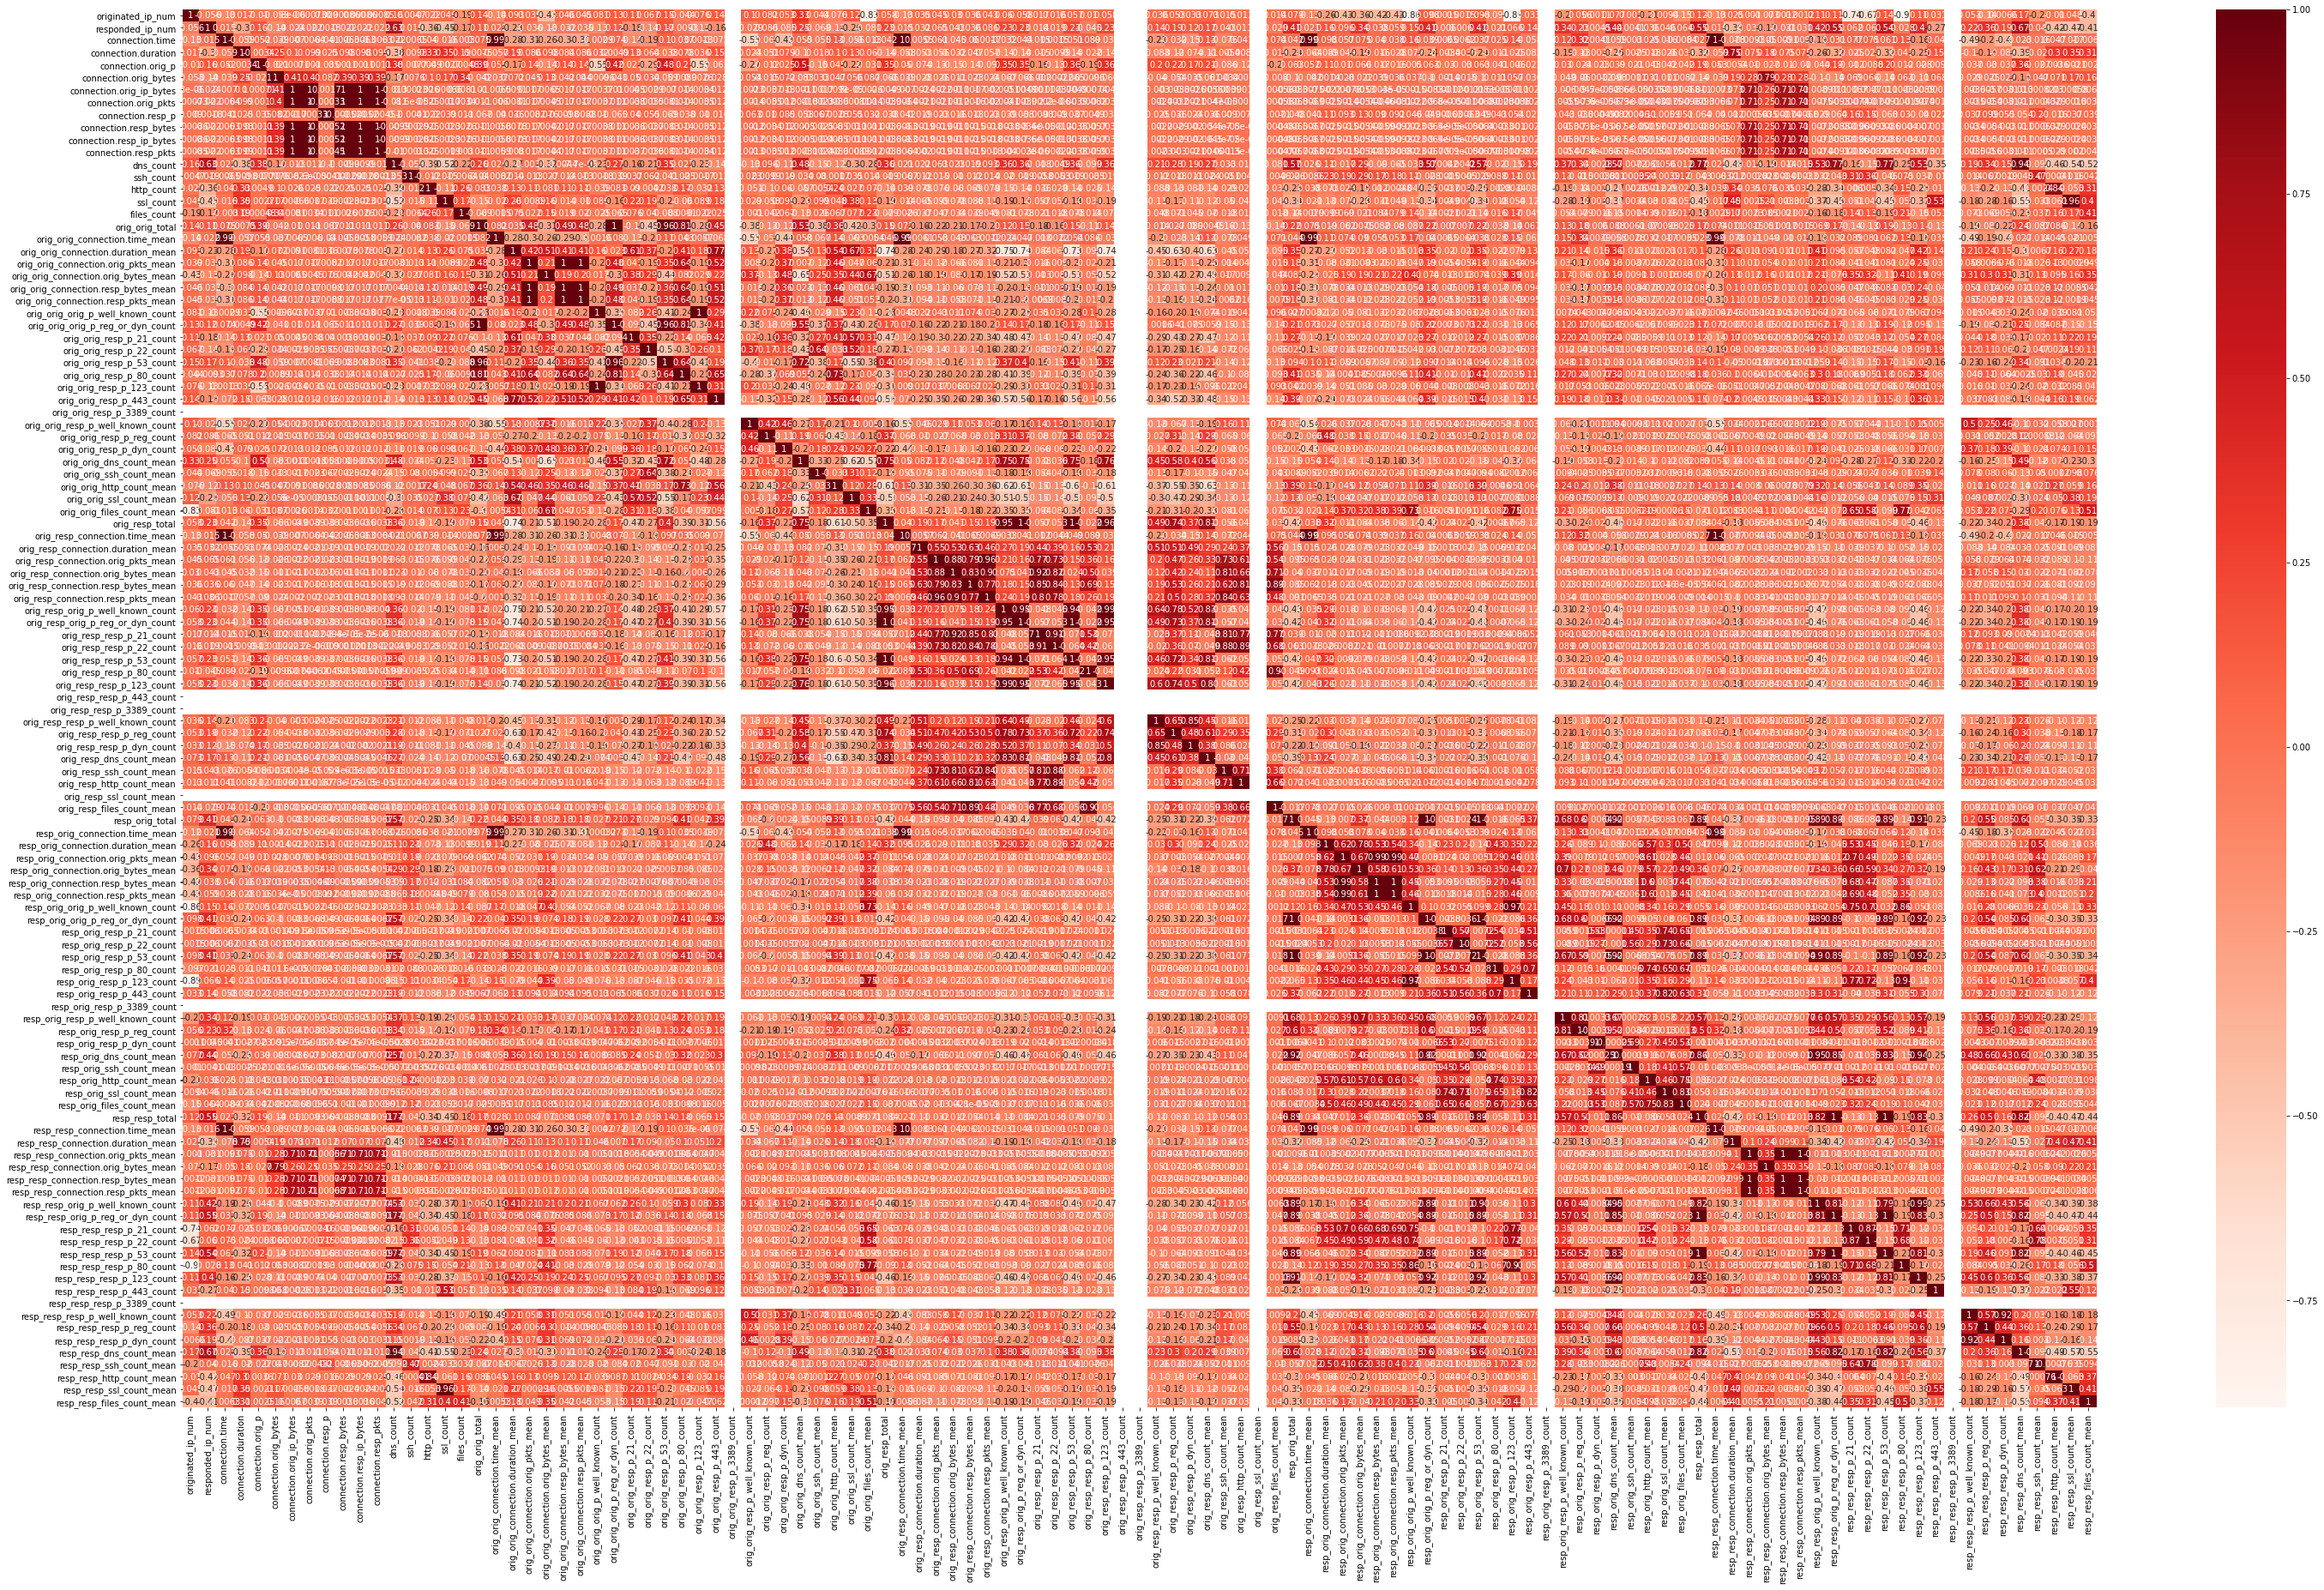

In [47]:
import seaborn as sns

# (https://medium.com/@sadievrenseker/preprocessing-end-to-end-data-preprocessing-1b0672087977)

plt.figure(figsize=(50,30))
cor = result_numerical.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## 5. Write the result to file

In [48]:
pd.reset_option('display.max_rows')

In [49]:
result_final = pd.concat([result, data_orig], axis=1)
result_final

originated_ip_num  responded_ip_num  connection.time  \
0                    1.0          0.269324         0.217624   
1                    1.0          0.842051         0.218743   
2                    1.0          0.748427         0.173792   
3                    1.0          0.748427         0.152883   
4                    1.0          0.748427         0.217621   
...                  ...               ...              ...   
21871                0.0          0.748427         0.846440   
21872                0.0          0.748427         0.900849   
21873                0.0          0.748427         0.904356   
21874                0.0          0.748427         0.930513   
21875                1.0          0.748427         0.696545   

       connection.duration  connection.orig_p  connection.orig_bytes  \
0             1.116586e-04           0.750450               0.006247   
1             2.369745e-02           0.750542               0.009319   
2             2.313497e-09           0.750511               0.000000   
3             8.868406e-08           0.750267               0.000841   
4             8.644768e-07           0.819090               0.000340   
...                    ...                ...                    ...   
21871         4.535407e-03           0.733511               0.000000   
21872         4.020009e-03           0.756402               0.000000   
21873         4.563609e-03           0.757897               0.000000   
21874         4.596248e-03           0.768915               0.000000   
21875         2.409239e-03           0.000000               0.000376   

       connection.orig_ip_bytes  connection.orig_pkts  connection.resp_p  \
0                      0.000044              0.000012           0.006745   
1                      0.000070              0.000016           0.006745   
2                      0.000000              0.000000           0.002075   
3                      0.000006              0.000002           0.005921   
4                      0.000003              0.000002           0.000794   
...                         ...                   ...                ...   
21871                  0.000005              0.000004           0.001206   
21872                  0.000005              0.000004           0.001206   
21873                  0.000005              0.000004           0.001206   
21874                  0.000005              0.000004           0.001206   
21875                  0.000004              0.000003           0.000031   

       connection.resp_bytes  connection.resp_ip_bytes  connection.resp_pkts  \
0               1.082816e-06              1.182362e-06              0.000006   
1               1.362483e-06              1.540207e-06              0.000009   
2               4.041816e-08              5.761374e-08              0.000001   
3               1.062607e-07              1.222692e-07              0.000001   
4               1.577612e-07              1.728412e-07              0.000001   
...                      ...                       ...                   ...   
21871           0.000000e+00              3.584855e-08              0.000001   
21872           0.000000e+00              3.584855e-08              0.000001   
21873           0.000000e+00              3.584855e-08              0.000001   
21874           0.000000e+00              3.584855e-08              0.000001   
21875           0.000000e+00              0.000000e+00              0.000000   

       dns_count  ssh_count  http_count  ssl_count  files_count  \
0            0.0        0.0         0.0        1.0     0.026316   
1            0.0        0.0         0.0        1.0     0.039474   
2            1.0        0.0         0.0        0.0     0.000000   
3            0.0        0.0         0.0        0.0     0.000000   
4            1.0        0.0         0.0        0.0     0.000000   
...          ...        ...         ...        ...          ...   
21871        0.0        0.0         0.0   

In [51]:
result_final.to_csv(PREFIX_PATH + 'final.csv', index=False, header=True)